## Infrared Thermography Temperature: Exploratory Data analysis

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets 


In [3]:
X.describe()

T_atm     Humidity     Distance    T_offset1    Max1R13_1  \
count  1020.000000  1020.000000  1018.000000  1020.000000  1020.000000   
mean     24.115392    28.723039     0.729784     0.968648    35.596533   
std       1.336338    13.071627     2.456486     0.362587     0.574888   
min      20.200000     9.900000     0.540000    -0.590000    33.897500   
25%      23.400000    17.600000     0.600000     0.772500    35.247500   
50%      24.000000    26.300000     0.620000     0.940000    35.548750   
75%      24.700000    36.200000     0.700000     1.140000    35.872500   
max      29.100000    61.200000    79.000000     2.875000    38.405000   

         Max1L13_1  aveAllR13_1  aveAllL13_1        T_RC1    T_RC_Dry1  ...  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000  ...   
mean     35.611474    34.888475    35.011345    35.659921    35.587143  ...   
std       0.549760     0.718613     0.633836     0.553897     0.569278  ...   
min      34.122500    31.770000    32.902500    33.985000    33.825000  ...   
25%      35.271875    34.456250    34.651250    35.332500    35.249375  ...   
50%      35.575000    34.915000    34.997500    35.602500    35.533750  ...   
75%      35.883125    35.300000    35.363125    35.910625    35.855625  ...   
max      38.042500    37.575000    37.680000    38.385000    38.380000  ...   

           T_FHCC1      T_FHRC1      T_FHLC1      T_FHBC1      T_FHTC1  \
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean     34.573865    34.567782    34.565340    34.487701    34.577293   
std       0.672461     0.669410     0.678663     0.668065     0.728678   
min      31.050000    31.452500    31.657500    31.280000    31.150000   
25%      34.213125    34.180000    34.177500    34.096875    34.225000   
50%      34.605000    34.597500    34.602500    34.512917    34.622500   
75%      34.965625    34.968125    34.965000    34.878125    35.012500   
max      37.125000    37.075000    37.165000    37.212500    37.367500   

         T_FH_Max1   T_FHC_Max1       T_Max1        T_OR1    T_OR_Max1  
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.000000  
mean     35.421555    35.094144    36.084785    35.805519    35.838277  
std       0.523477     0.576045     0.491821     0.559258     0.559316  
min      33.407500    32.440000    34.892500    33.802500    33.835000  
25%      35.116875    34.756458    35.775000    35.474375    35.500000  
50%      35.391250    35.100000    36.027500    35.790000    35.825000  
75%      35.675000    35.415000    36.280000    36.087500    36.120625  
max      38.002500    37.632500    38.807500    38.417500    38.455000  

[8 rows x 30 columns]

In [6]:
df = X
df.loc[:, "aveOralF"] = y["aveOralF"]

# Reorganise columns
temp_cols=df.columns.tolist()
cols = temp_cols[2:3] + [temp_cols[1]] + [temp_cols[0]] + temp_cols[3:]
df = df[cols][(df.Age != "21-30") & (df.Distance < 1)]
df

Ethnicity    Age  Gender  T_atm  Humidity  Distance  \
0                         White  41-50    Male   24.0      28.0       0.8   
1     Black or African-American  31-40  Female   24.0      26.0       0.8   
4                         White  18-20    Male   24.0      27.0       0.8   
7                         White  18-20  Female   25.0      30.0       0.8   
8                         Asian  18-20  Female   25.0      30.0       0.8   
...                         ...    ...     ...    ...       ...       ...   
1015                      Asian  21-25  Female   25.7      50.8       0.6   
1016                      White  21-25  Female   25.7      50.8       0.6   
1017  Black or African-American  18-20  Female   28.0      24.3       0.6   
1018            Hispanic/Latino  26-30    Male   25.0      39.8       0.6   
1019                      White  18-20  Female   23.8      45.6       0.6   

      T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  \
0        0.7025    35.0300    35.3775      34.4000  ...  33.4775  33.3725   
1        0.7800    34.5500    34.5200      33.9300  ...  34.0550  33.6775   
4        0.8950    35.5450    35.6650      34.9100  ...  35.1600  34.3975   
7        0.5875    35.1050    34.8700      34.2725  ...  33.4025  33.3925   
8        0.9775    35.3075    35.4225      34.5575  ...  35.0250  35.1725   
...         ...        ...        ...          ...  ...      ...      ...   
1015     1.2225    35.6425    35.6525      34.8575  ...  35.3475  35.4000   
1016     1.4675    35.9825    35.7575      35.4275  ...  35.2175  35.2200   
1017     0.1300    36.4075    36.3400      35.8700  ...  35.2400  35.2275   
1018     1.2450    35.8150    35.5250      34.2950  ...  35.0200  34.9250   
1019     0.8675    35.7075    35.5825      34.8875  ...  34.6500  34.6700   

      T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  \
0     33.4925  33.0025    34.5300     34.0075  35.6925  35.6350    35.6525   
1     33.9700  34.0025    34.6825     34.6600  35.1750  35.0925    35.1075   
4     34.6700  33.8275    35.4175     35.3725  35.8950  35.5875    35.6175   
7     33.4600  33.5550    34.1325     33.9975  35.6800  35.4425    35.4900   
8     35.1900  35.2900    35.6550     35.4750  35.8525  35.3575    35.3825   
...       ...      ...        ...         ...      ...      ...        ...   
1015  35.1375  35.2750    35.8525     35.7475  36.0675  35.6775    35.7100   
1016  35.2075  35.0700    35.7650     35.5525  36.5000  36.4525    36.4900   
1017  35.3675  35.3425    36.3750     35.7100  36.5350  35.9650    35.9975   
1018  34.7150  34.5950    35.4150     35.3100  35.8600  35.4150    35.4350   
1019  34.2150  34.7100    35.1525     35.1175  35.9725  35.8900    35.9175   

      aveOralF  
0        36.85  
1        37.00  
4        36.80  
7        36.80  
8        36.80  
...        ...  
1015     36.95  
1016     37.25  
1017     37.35  
1018     37.15  
1019     37.05  

[1007 rows x 34 columns]

## Feature Distribution

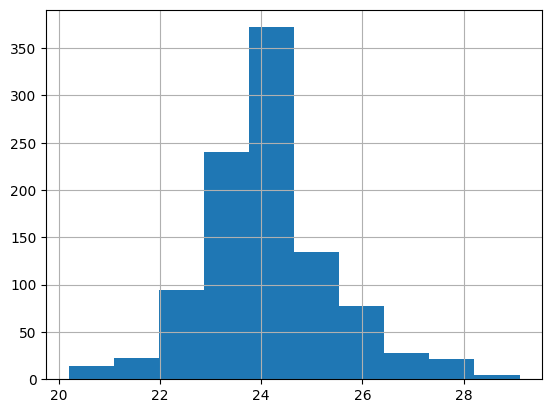

In [8]:
# plot histogram of ambient T
df.T_atm.hist();

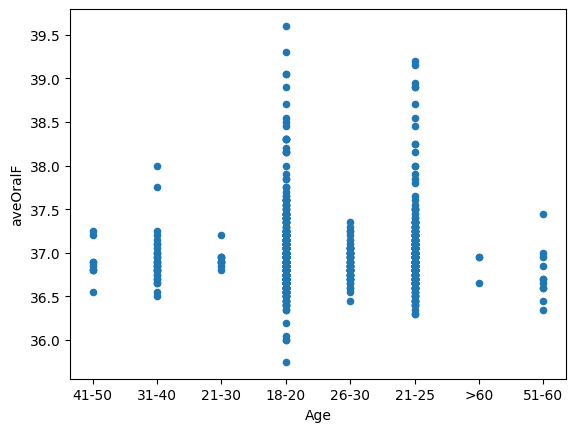

In [7]:
# Make a scatter plot of average oral temperature
# with respect to age
X.plot(x="Age", y="aveOralF", kind="scatter");

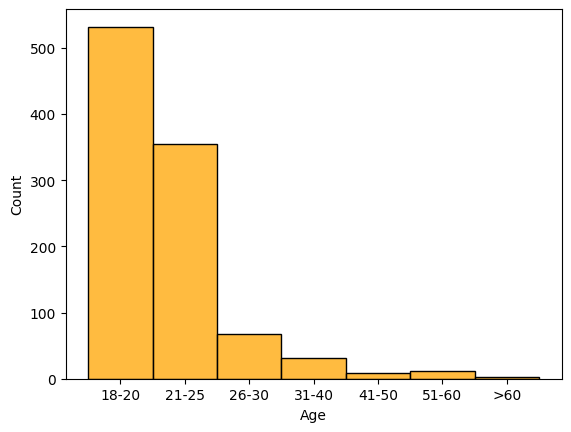

In [6]:
# Plot Age histogram
sns.histplot(data=df.Age.sort_values(), color="orange");

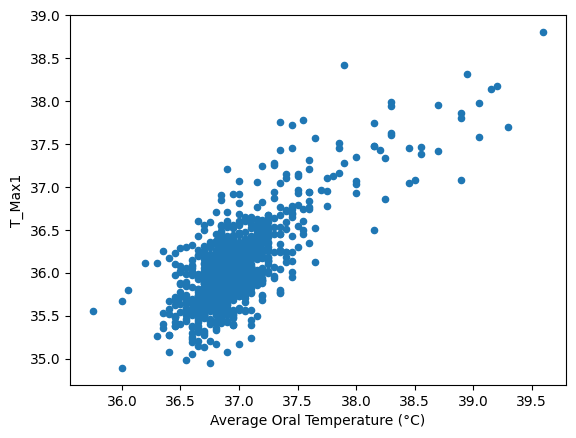

In [9]:
# Plot Maximum Face T as a function of Average Oral T
df.plot(x="aveOralF", y="T_Max1", kind="scatter")
plt.xlabel("Average Oral Temperature (°C)");

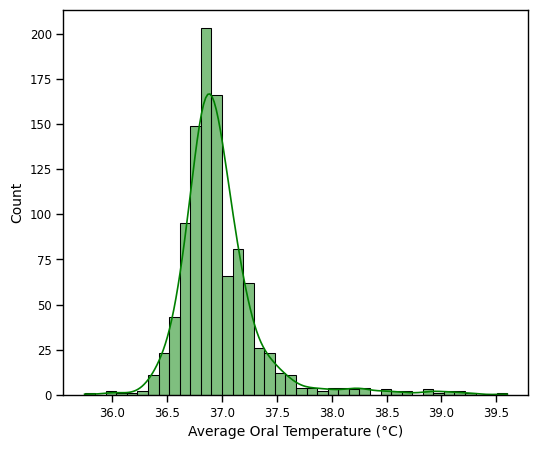

In [10]:
# Plot Average Oral T histogram
fig = plt.figure(figsize=(6, 5))
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":8,"axes.labelsize":10, 'xtick.labelsize': 'small', 'ytick.labelsize': 'small'})
age_dist = sns.histplot(data=y.aveOralF.sort_values(), color="green", bins=40, kde=True)
age_dist.set(xlabel='Average Oral Temperature (°C)');

In [12]:
fig = age_dist.get_figure()
#fig.savefig("eda/Age_distribution.png", dpi=500)

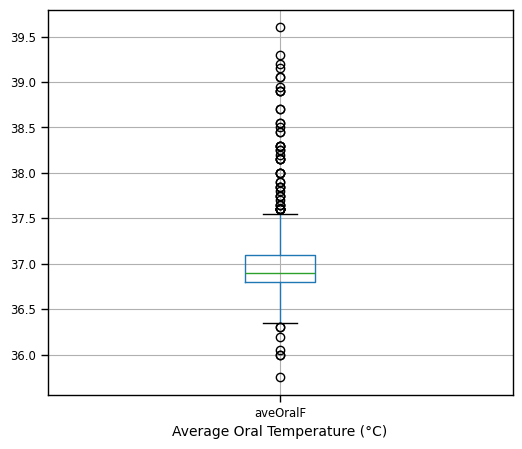

In [13]:
# # Plot Average Oral T boxplot
fig = plt.figure(figsize=(6, 5))
y.boxplot("aveOralF")
plt.xlabel("Average Oral Temperature (°C)");

In [11]:
#fig.savefig("eda/Age_boxplot.png", dpi=500)

## Feature Correlation

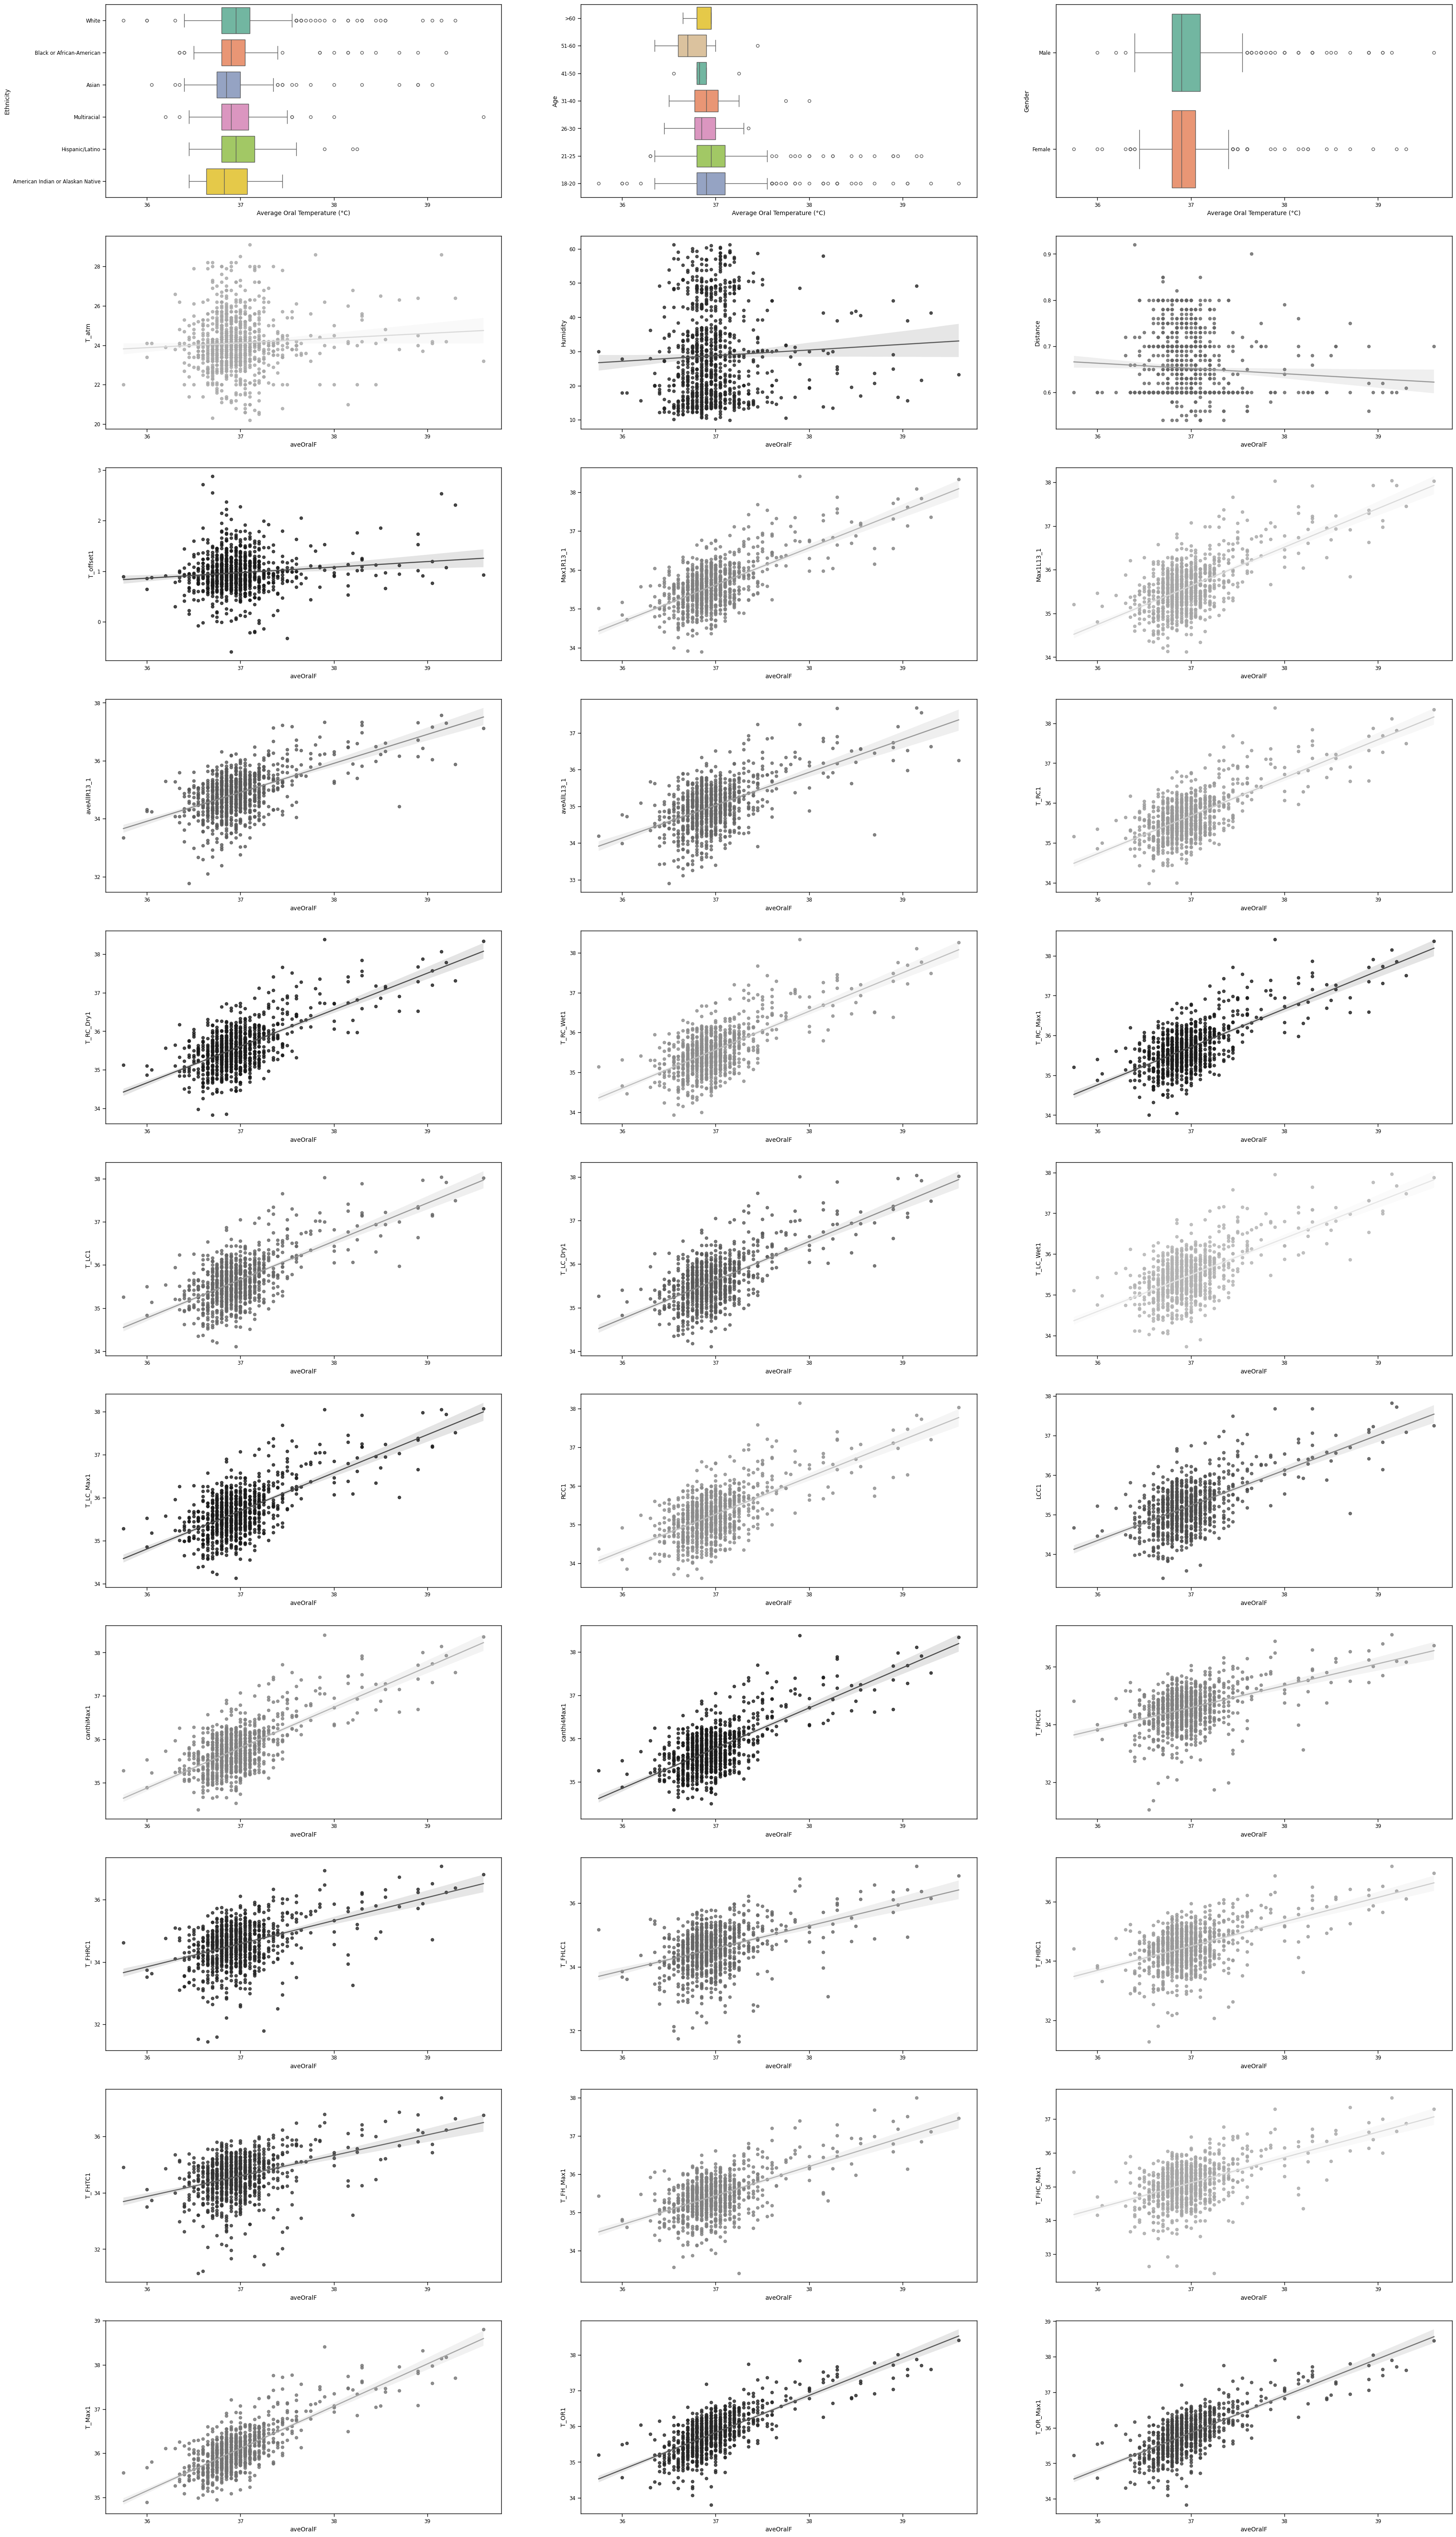

In [14]:
# Plot a set of graphs :
# box plots for categorical features
# scatter plots for numerical features

colors = [random.randrange(10, 80, 5) / 100 for i in range(len(X.columns))]

dims = (11, 3)

f, axes = plt.subplots(dims[0], dims[1], figsize=(40, 75))
axis_i, axis_j = 0, 0
c = 0

sns.set_context("paper", rc={"font.size":25,"axes.titlesize":8,"axes.labelsize":20, 'xtick.labelsize': 'medium', 'ytick.labelsize': 'medium'})

for col in cols:
  if df[col].dtype == object and col != "aveOralF" :
      order = None
      if col == "Age":
         order = ["18-20", "21-25","26-30","31-40","41-50","51-60",">60"]
         order.reverse()
      box_plot = sns.boxplot(x=df.aveOralF, y=df[col], ax=axes[axis_i, axis_j], \
                             order=order, palette="Set2", hue=df[col]) #color=str(colors[c]))
      box_plot.set(xlabel='Average Oral Temperature (°C)')
      
  if df[col].dtype != object and col != "aveOralF":
     sns.regplot(x=df.aveOralF, y=df[col], ax=axes[axis_i, axis_j], color=str(colors[c]), line_kws=dict(color=str(colors[c] + 0.2))) 
  c += 1
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

fig = f.get_figure()
#fig.savefig("eda/global.png", dpi=500) 

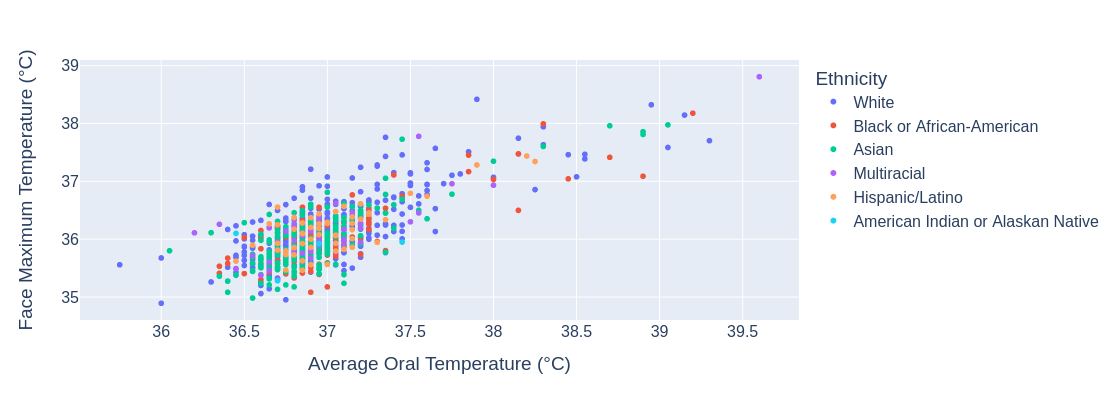

In [27]:
import plotly.express as px
import plotly

fig = px.scatter(df, x="aveOralF", y="T_Max1",
                 labels=dict(aveOralF="Average Oral Temperature (°C)", T_Max1="Face Maximum Temperature (°C)"),
                 color="Ethnicity", size_max=20,width=800, height=400)

fig.update_layout(
        font=dict(
        size=16,
    )
)

fig.show()

In [28]:
fig.write_image("eda/TMax_vs_Oral_Ethnicity.png")

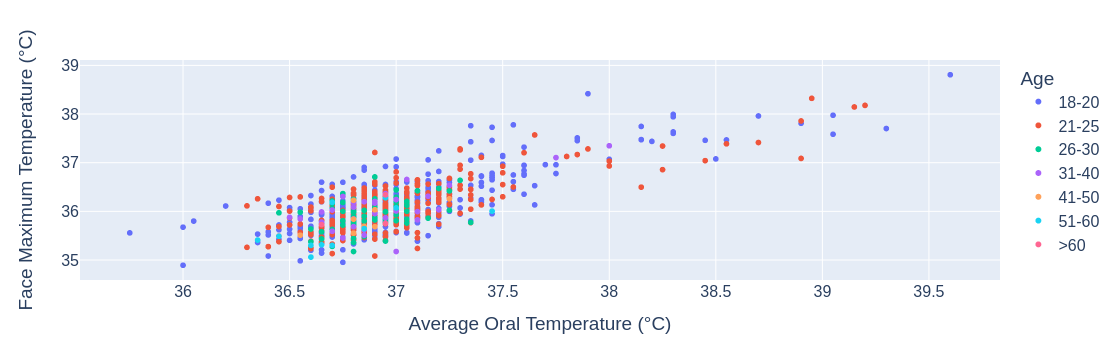

In [29]:
fig = px.scatter(df.sort_values(by=["Age"]), x="aveOralF", y="T_Max1",
                 labels=dict(aveOralF="Average Oral Temperature (°C)", T_Max1="Face Maximum Temperature (°C)"),
                 color="Age", size_max=20)
fig.update_layout(
        font=dict(
        size=16)
)

fig.show()

In [168]:
#fig.write_image("eda/TMax_vs_Oral_Age.png")

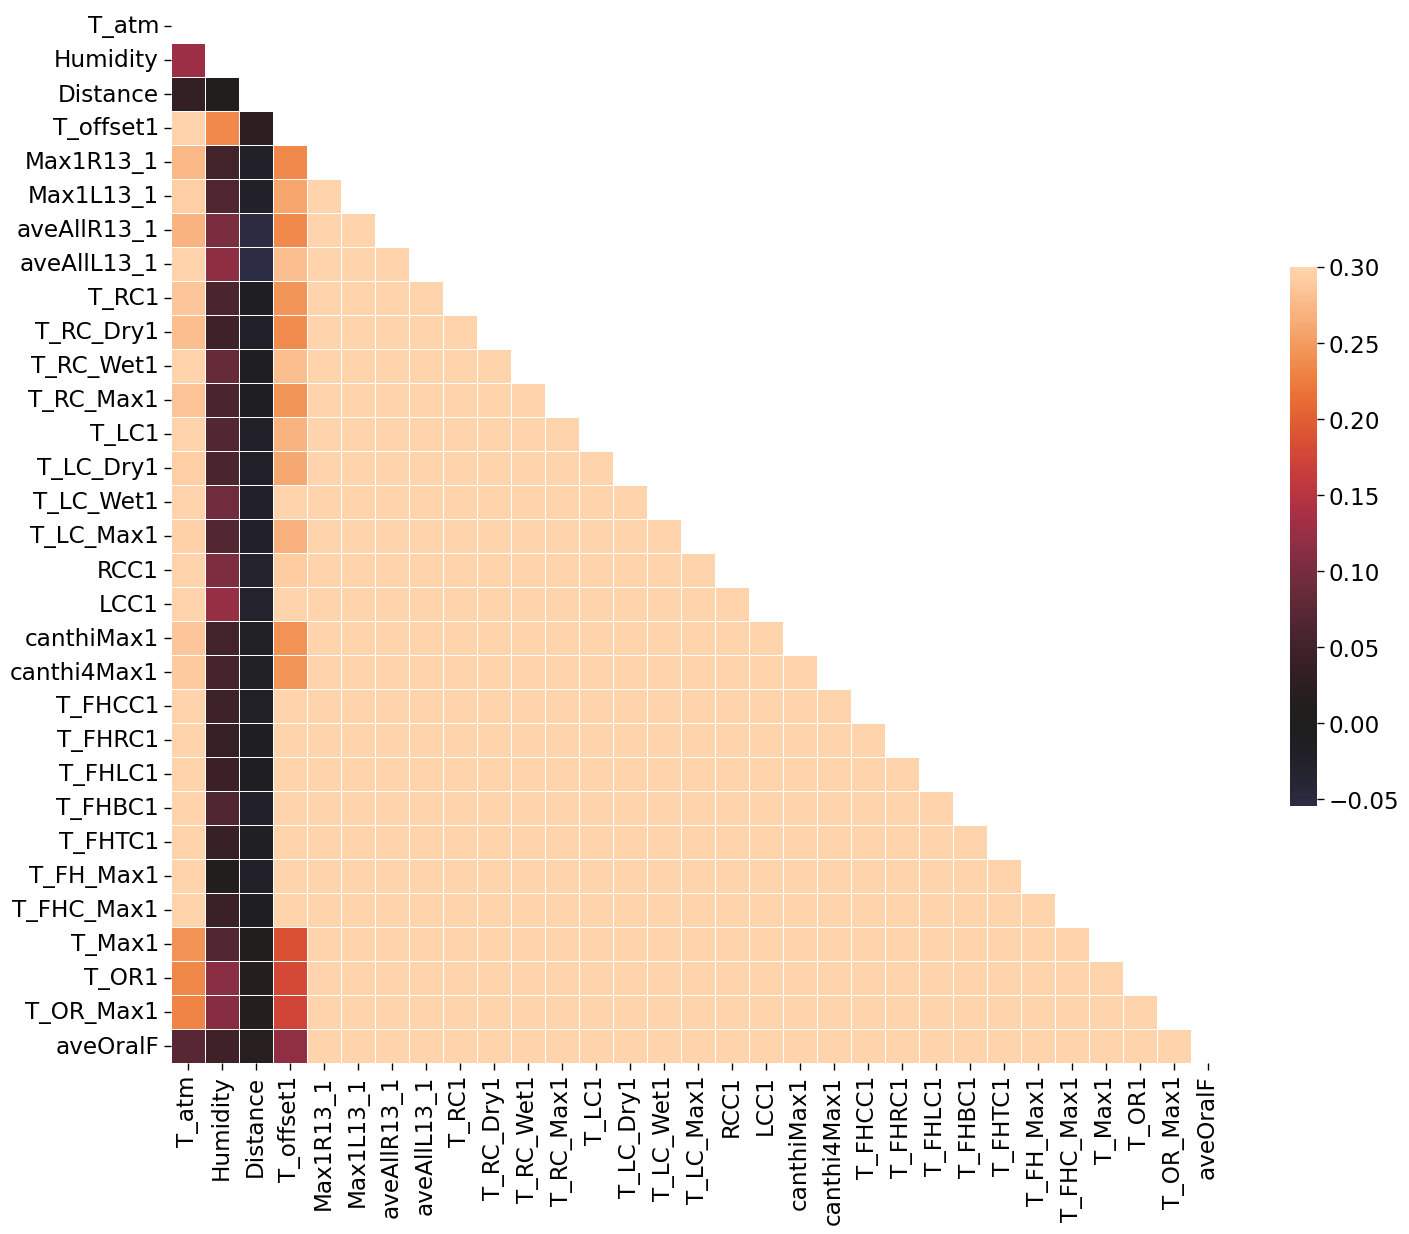

In [173]:
# Feature Correlation matrix

import numpy as np

corr = df[[col for col in cols if df[col].dtype != object]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 14))

# Draw the heatmap with the mask and correct aspect ratio
map = sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

fig = map.get_figure()
fig.savefig("eda/heatmap.png", dpi=500) 